In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
g=9.8
u=25
ang=40
ux=u*np.cos(np.radians(ang))
uy=u*np.sin(np.radians(ang))
x0=np.array([0,0,ux,uy])

dt=0.1

In [3]:
M=np.array([1,0,dt,0,0,1,0,dt,0,0,1,0,0,0,0,1]).reshape(4,4)
M

array([[1. , 0. , 0.1, 0. ],
       [0. , 1. , 0. , 0.1],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ]])

In [4]:
B=np.array([0,-0.5*g*dt**2,0,-g*dt])

In [5]:
tp=uy/g
steps=int(2*tp/dt)+1

In [6]:
X=np.zeros((steps,len(x0)))

In [7]:
x=x0.copy()
for i in range(steps):
    X[i]=x.copy()
    x=M@x+B

Text(0.5, 1.0, 'vertical displacement vs time')

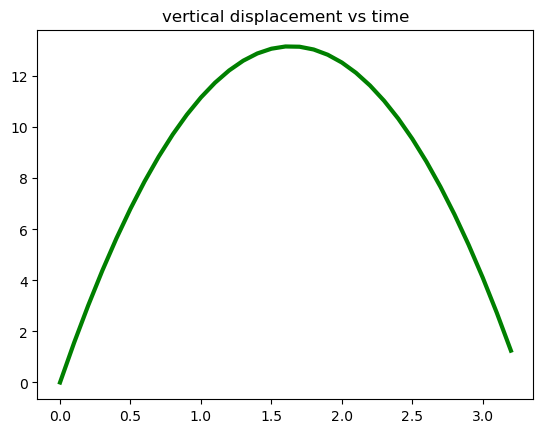

In [8]:
plt.plot(dt*np.arange(steps),X[:,1],'g-',lw=3)
plt.title('vertical displacement vs time')

Text(0.5, 1.0, 'horizontal displacement vs time')

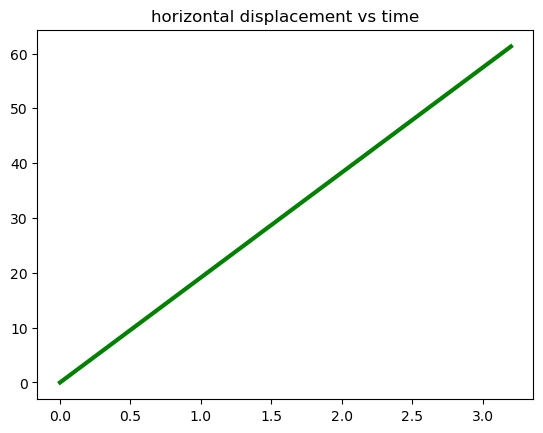

In [9]:
plt.plot(dt*np.arange(steps),X[:,0],'g-',lw=3)
plt.title('horizontal displacement vs time')

Text(0.5, 1.0, 'trajectory of the projectile')

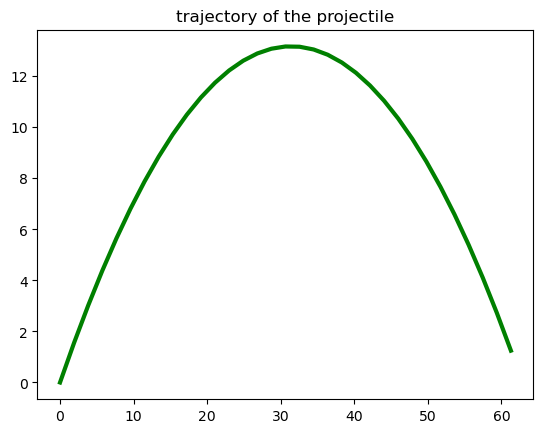

In [10]:
plt.plot(X[:,0],X[:,1],'g-',lw=3)
plt.title('trajectory of the projectile')

In [11]:
def f(t,x):
    x,y,vx,vy=x
    ax=0
    ay=-g
    return np.array([vx,vy,ax,ay])
    #return np.array([x[2],x[3],0,-g])

In [23]:
ans=sp.integrate.solve_ivp(f,[0,10],x0,dense_output=True)

In [30]:
t=np.linspace(0,3,20)

In [31]:
X_rk4=ans.sol(t).T

In [32]:
X_rk4.shape

(20, 4)

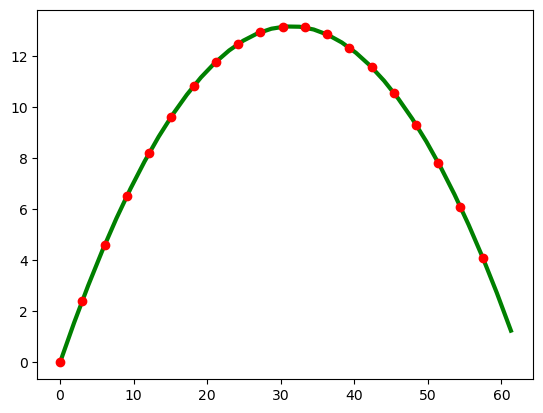

In [33]:
plt.plot(X[:,0],X[:,1],'g-',lw=3,label='book')
plt.plot(X_rk4[:,0],X_rk4[:,1],'ro',label='RK4')

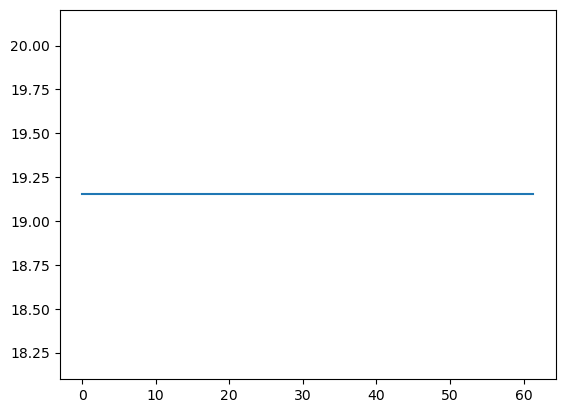

In [34]:
plt.plot(X[:,0],X[:,2])

Text(0, 0.5, 'Vy')

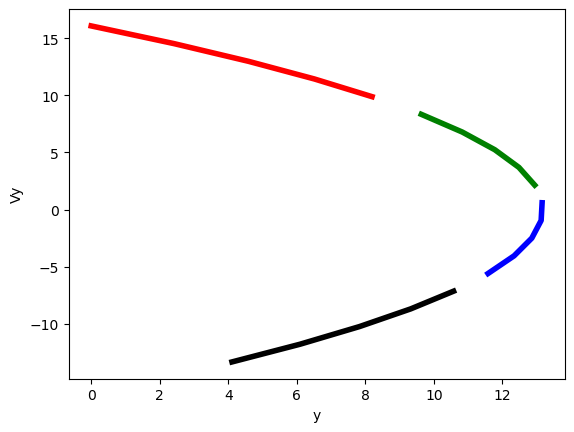

In [40]:
c=['r-','g-','b-','k-']
for i in range(4):
    plt.plot(X_rk4[i*5:(i+1)*5,1],X_rk4[i*5:(i+1)*5,3],c[i],lw=4)
    
plt.xlabel('y')
plt.ylabel('Vy')